# NLP Shakira Dataset

In [1]:
import numpy as np
import pandas as pd

## Get data

In [2]:
df = pd.read_csv('files/Youtube05-Shakira.csv')
df.info() # 370 comments and their class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  370 non-null    object
 1   AUTHOR      370 non-null    object
 2   DATE        370 non-null    object
 3   CONTENT     370 non-null    object
 4   CLASS       370 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 14.6+ KB


In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


## Some EDA

#### Target class breakdown

In [8]:
df['CLASS'].value_counts() # 196 in class 0 and 174 in class 1. 

0    196
1    174
Name: CLASS, dtype: int64

In [10]:
df[df['CLASS'] == 1].head() # so class 0 is ham, class 1 is spam

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
7,z12uujnj2sifvzvav04chpypvofvexpoggg,Sudheer Yadav,2015-05-28T10:28:25.133000,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...,1
22,z13zjlpo2nbehxwf322gelhzwmqwgn1mt,Raafat saeed,2015-05-27T04:19:29.178000,Check out this playlist on YouTube:﻿,1
31,z13uhhxp5nvig15yc04citszvtagwtmpqcc,Terry Short,2015-05-26T14:33:52.496000,Support the fight for your 4th amendment right...,1
36,z13gv1bxbuytgjl3o23fdr5r3kaadbbm1,‫حلم الشباب‬‎,2015-05-25T23:42:49.533000,Check out this video on YouTube:﻿,1
51,z12bfraboyajftgbz04ccbkr3xjxfxyxsew,Abdullah Fawzi,2015-05-25T06:25:22.319000,"coby this USL and past :<br /><a href=""http://...",1


#### Comment length

In [11]:
df['length'] = df['CONTENT'].apply(len)

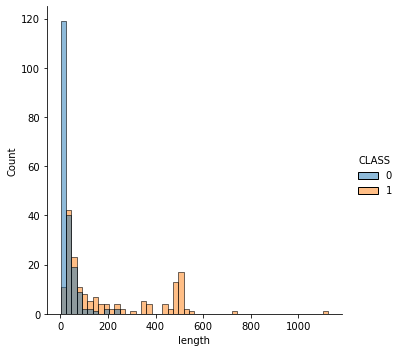

In [12]:
sns.displot(data=df, x='length', hue='CLASS') # spam comments tend to be longer

## Preprocessing 

In [13]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
# Function that tokenizes text message
def text_process(review):
    """ 
    1. Remove punctuation
    2. Remove stop words
    3. Return list of clean text words
    Opt: For future, also do stemming (break down words into stems to add up derived words) and other text normalization methods
    """
    # Remove punctuation
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Remove stop words
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    # Return list of clean words
    return clean

## Split data into train and test 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df['CONTENT'] 
y = df['CLASS']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Logistic Regression 

#### Build and train model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
# build pipeline
lr_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', LogisticRegression(max_iter=2000))
])

In [20]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=2000))])

#### Make predictions 

In [21]:
lr_pred = lr_pipeline.predict(X_valid)

#### Evaluate model performance

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

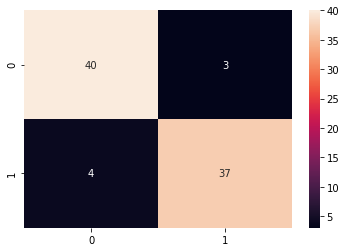

In [23]:
# 40 TN 3 FP, 4 FN, 37 TP
sns.heatmap(confusion_matrix(y_valid, lr_pred), annot=True, fmt='g')

In [24]:
# 92% accuracy, precision, recall, f1 score
print(classification_report(y_valid, lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.93      0.90      0.91        41

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



### K Nearest Neighbors

#### Build and train model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# build pipeline
knn_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', KNeighborsClassifier())
])

In [27]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier())])

#### Make predictions 

In [28]:
knn_pred = knn_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

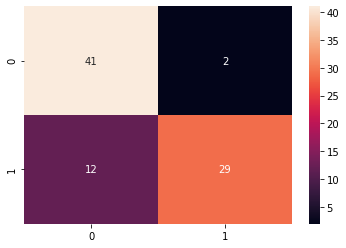

In [29]:
# 41 TN 2 FP, 12 FN, 29 TP
sns.heatmap(confusion_matrix(y_valid,knn_pred), annot=True, fmt='g')

In [30]:
# 83% accuracy, 85% precision, 83% recall, 83% f1 score
print(classification_report(y_valid, knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        43
           1       0.94      0.71      0.81        41

    accuracy                           0.83        84
   macro avg       0.85      0.83      0.83        84
weighted avg       0.85      0.83      0.83        84



#### Tune hyperparameter

In [36]:
error_rates = []

for k in range(1,100):
    # build pipeline
    knn_pipeline = Pipeline([
        # (step_name, what_to_do)

        # Step 1: Turn corpus into bag of words 
        ('bow', CountVectorizer(analyzer=text_process)),

        # Step 2: Give TF-IDF weights to bag of words
        ('tfidf', TfidfTransformer()),

        # Step 3: Fit classification model
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])
    # fit 
    knn_pipeline.fit(X_train,y_train)
    # predict
    knn_pred = knn_pipeline.predict(X_valid)
    # calculate error
    err = np.mean(y_valid != knn_pred)
    error_rates.append(err)

In [37]:
import plotly.express as px 
px.line(df, x=range(1,100), y=error_rates, title='Error Rate vs. K value', labels={'x':'K','y':'Error Rate'})

In [38]:
# build pipeline
knn_pipeline = Pipeline([
    # (step_name, what_to_do)

    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),

    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),

    # Step 3: Fit classification model
    ('classifier', KNeighborsClassifier(n_neighbors=68))
])
# fit 
knn_pipeline.fit(X_train,y_train)
# predict
knn_pred = knn_pipeline.predict(X_valid)

<AxesSubplot:>

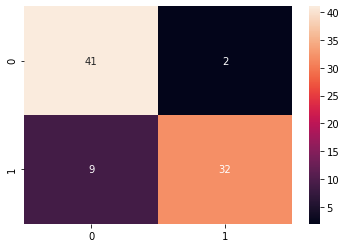

In [40]:
# 41 TN 2 FP, 9 FN, 32 TP
sns.heatmap(confusion_matrix(y_valid,knn_pred), annot=True, fmt='g')

In [39]:
# 87% accuracy, 88% precision, 87% recall, 87% f1 score
print(classification_report(y_valid, knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        43
           1       0.94      0.78      0.85        41

    accuracy                           0.87        84
   macro avg       0.88      0.87      0.87        84
weighted avg       0.88      0.87      0.87        84



### Decision Tree

#### Build and train model

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# build pipeline
dt_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', DecisionTreeClassifier())
])

In [43]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

#### Make predictions 

In [44]:
dt_pred = dt_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

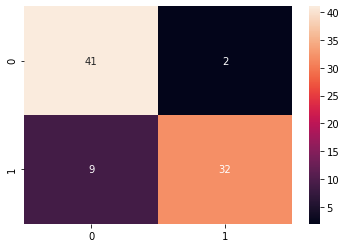

In [45]:
# 41 TN 2 FP, 9 FN, 32 TP
sns.heatmap(confusion_matrix(y_valid, dt_pred), annot=True, fmt='g')

In [46]:
# 87% accuracy, 88% precision, 87% recall, 87% f1 score
print(classification_report(y_valid, dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        43
           1       0.94      0.78      0.85        41

    accuracy                           0.87        84
   macro avg       0.88      0.87      0.87        84
weighted avg       0.88      0.87      0.87        84



### Random Forest

#### Build and train model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# build pipeline
rf_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', RandomForestClassifier())
])

In [49]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

#### Make predictions 

In [50]:
rf_pred = rf_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

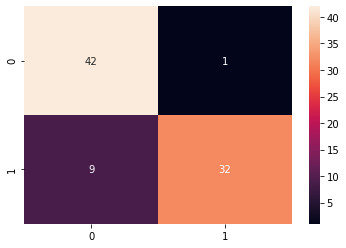

In [51]:
# 42 TN 1 FP, 9 FN, 32 TP
sns.heatmap(confusion_matrix(y_valid, rf_pred), annot=True, fmt='g')

In [52]:
# 88% accuracy, 89% precision, 88% recall, 88% f1 score
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.97      0.78      0.86        41

    accuracy                           0.88        84
   macro avg       0.90      0.88      0.88        84
weighted avg       0.89      0.88      0.88        84



### SVM

#### Build and train model

In [53]:
from sklearn.svm import SVC

In [55]:
# build pipeline
svm_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', SVC())
])

In [56]:
svm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

#### Make predictions 

In [57]:
svm_pred = svm_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

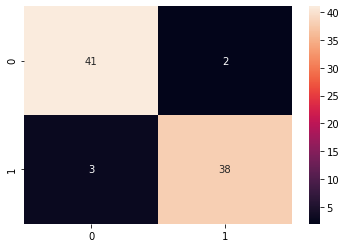

In [58]:
# 41 TN 2 FP, 3 FN, 38 TP
sns.heatmap(confusion_matrix(y_valid, svm_pred), annot=True, fmt='g')

In [59]:
# 94% accuracy, 94% precision, 94% recall, 94% f1 score
print(classification_report(y_valid, svm_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.95      0.93      0.94        41

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



### Naive Bayes

#### Build and train model

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
# build pipeline
nb_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', MultinomialNB())
])

In [62]:
nb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### Make predictions 

In [63]:
nb_pred = nb_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

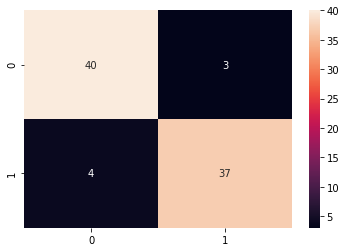

In [64]:
# 40 TN 3 FP, 4 FN, 37 TP
sns.heatmap(confusion_matrix(y_valid, nb_pred), annot=True, fmt='g')

In [65]:
# 92% accuracy, 92% precision, 92% recall, 92% f1 score
print(classification_report(y_valid, nb_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.93      0.90      0.91        41

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



### Neural Network

#### Build and train model

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
# build pipeline
nn_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', MLPClassifier(max_iter=2000))
])

In [71]:
nn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier(max_iter=2000))])

#### Make predictions 

In [72]:
nn_pred = nn_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

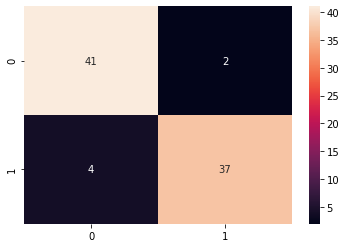

In [73]:
# 41 TN 2 FP, 4 FN, 37 TP
sns.heatmap(confusion_matrix(y_valid, nn_pred), annot=True, fmt='g')

In [74]:
# 93% accuracy, precision, recall, f1 score
print(classification_report(y_valid, nn_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.95      0.90      0.92        41

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



#### Tune hyperparameters

In [104]:
p_grid = {
    'hidden_layer_sizes': [(100,), (100,100,), (100,100,100,)],
    'alpha': [0.001,0.01,0.1,1,10],
    'learning_rate_init': [0.0001,0.001,0.01,0.1,1],
    'solver': ['lbfgs', 'sgd', 'adam']    
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [105]:
# build pipeline
nn_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', GridSearchCV(MLPClassifier(max_iter=2000), p_grid, verbose=3))
])

In [106]:
nn_pipeline.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.897, total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.872, total=   0.5s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.769, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.868, total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.737, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.487, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.487, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 
[CV]  alph

[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs, score=0.846, total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs, score=0.872, total=   0.5s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs, score=0.769, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs, score=0.868, total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=lbfgs, score=0.684, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.1, solver=sgd 
[CV]  alpha=0.001, hidden_layer_

[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.868, total=   1.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.763, total=   1.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.821, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.821, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.821, total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_r

[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd, score=0.737, total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam, score=0.923, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam, score=0.872, total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam, score=0.769, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam, score=0.842, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam 
[

[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.737, total=   0.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.538, total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.474, total=   0.3s
[CV] alpha=0.001, hidden_layer

[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.897, total=   0.7s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.872, total=   0.7s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.795, total=   0.7s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.868, total=   0.8s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.763, total=   0.6s
[CV] alpha=0.001, hidden_layer_sizes=(100, 100, 10

[CV]  alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.744, total=   0.5s
[CV] alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.868, total=   0.5s
[CV] alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.789, total=   0.5s
[CV] alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=lbfgs, score=0.923, total=   0.4s
[CV] alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=lbfgs, score=0.872, total=   0.6s
[CV] alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer

[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.846, total=   0.5s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.923, total=   0.7s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.769, total=   0.8s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.868, total=   0.4s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.737, total=   0.6s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_ra

[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam, score=0.744, total=   0.1s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam, score=0.868, total=   0.1s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam, score=0.789, total=   0.1s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs, score=0.923, total=   0.6s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs, score=0.872, total=   0.8s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs 


[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.872, total=   1.4s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.872, total=   1.5s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.769, total=   1.3s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.868, total=   1.3s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.789, total=   1.4s
[CV] alpha=0.01, hidden

[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=lbfgs, score=0.737, total=   0.9s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd, score=0.872, total=   0.2s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd, score=0.846, total=   0.2s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd, score=0.769, total=   0.2s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd 
[CV]  alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.1, solver=sgd, score=0.868, total=   0.2s
[CV] alpha=0.01, hidden_layer_sizes=(100, 100, 100), lear

[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs, score=0.923, total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs, score=0.872, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs, score=0.769, total=   0.5s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs, score=0.868, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=lbfgs, score=0.737, total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=0.1, hidden_layer_si

[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs, score=0.923, total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs, score=0.872, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs, score=0.769, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs, score=0.868, total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=lbfgs, score=0.737, total=   0.5s
[CV] alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=sgd 
[CV]  alpha=0.1, hidden_layer_sizes=(100,), learning_rate_init=1, solver

[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.769, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.868, total=   0.6s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.763, total=   0.5s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs, score=0.923, total=   0.9s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs, score=0.872, total=   0.9s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs 


[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=sgd, score=0.632, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.692, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.872, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.897, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.737, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=0.1, hidden_layer_sizes=(100,

[CV]  alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=lbfgs, score=0.737, total=   1.2s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.872, total=   1.1s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.897, total=   1.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.795, total=   0.9s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 
[CV]  alpha=0.1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.526, total=   0.0s
[CV] alpha=0.1, hidden_layer_sizes=(100, 100, 100), learn

[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.923, total=   0.4s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.872, total=   0.5s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.795, total=   0.2s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.868, total=   0.4s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=lbfgs, score=0.816, total=   0.4s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 
[CV]  alpha=1, hidden_layer_sizes=(100,), 

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.795, total=   2.9s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.538, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.526, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.474, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.923, total=   0.7s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=0.001,

[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=sgd, score=0.763, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.590, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.846, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.692, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.763, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.605, total=   0.

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.923, total=   3.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.795, total=   3.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.769, total=   3.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.842, total=   3.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.658, total=   3.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.923, total=   0.7s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.872, total=   0.7s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.769, total=   0.8s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.868, total=   0.8s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden

[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=sgd, score=0.526, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=sgd 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=sgd, score=0.605, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.923, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.513, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.462, total=   0.0s
[CV] alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100), learning_rate_ini

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.923, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.692, total=   4.6s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.744, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.842, total=   4.6s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.737, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.923, total=   0.8s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.872, total=   0.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.769, total=   0.8s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.868, total=   0.9s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_r

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.923, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.872, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.769, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.868, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd, score=0.737, total=   4.5s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam, score=0.923, total=   0.2s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam, score=0.872, total=   0.2s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam, score=0.795, total=   0.3s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam 
[CV]  alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam, score=0.868, total=   0.2s
[CV] alpha=1, hidden_layer_sizes=(100, 100, 100), learning_rate_init=

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.564, total=   3.1s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.436, total=   3.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.526, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd, score=0.763, total=   3.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, score=0.538, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, score=0.590, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, score=0.615, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam, score=0.526, total=   2.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,)

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.513, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.513, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.538, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.553, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd, score=0.526, total=   2.9s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.538, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.590, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam, score=0.605, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning

[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.632, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100,), learning_rate_init=1, solver=adam, score=0.474, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs, score=0.538, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=10, hidd

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   3.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   3.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   3.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd, score=0.526, total=   3.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=sgd, score=0.526, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.513, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.513, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.538, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.526, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.0001, solver=adam, score=0.526, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.513, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.538, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.526, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=lbfgs 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   3.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.538, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.526, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=sgd, score=0.526, total=   3.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.513, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.513, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.538, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam, score=0.526, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha

[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.513, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.513, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.590, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.553, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100), learning_rate_init=1, solver=adam, score=0.526, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd, score=0.513, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd, score=0.538, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd, score=0.526, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=sgd, score=0.526, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.513, total=   5.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.513, total=   5.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.538, total=   5.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.526, total=   5.4s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, solver=adam, score=0.526, total=   5.4s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.513, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.538, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=lbfgs, score=0.526, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=(100, 1

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.513, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.538, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.526, total=   4.5s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd 


/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd, score=0.526, total=   4.6s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.513, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.513, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.538, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=adam, score=0.526, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), 

[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=lbfgs, score=0.526, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd, score=0.513, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd, score=0.513, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd, score=0.538, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd, score=0.526, total=   0.0s
[CV] alpha=10, hidden_layer_sizes=(100, 100, 100), learning_rate_init=1, solver=sgd 
[CV]  al

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed: 13.5min finished


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb8471a0c10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 GridSearchCV(estimator=MLPClassifier(max_iter=2000),
                              param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                                          'hidden_layer_sizes': [(100,),
                                                                 (100, 100),
                                                                 (100, 100,
                                                                  100)],
                                          'learning_rate_init': [0.0001, 0.001,
                                                                 0.01, 0.1, 1],
                                          'solver': ['lbfgs', 'sgd', 'adam']},
                              verbose=3))])

In [107]:
nn_pred = nn_pipeline.predict(X_valid)

<AxesSubplot:>

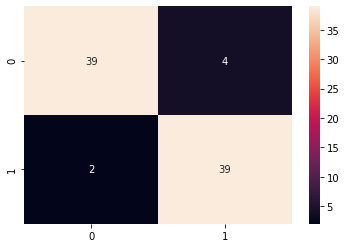

In [108]:
# 4935 TN 710 FP, 505 FN, 5100 TP
sns.heatmap(confusion_matrix(y_valid, nn_pred), annot=True, fmt='g')

In [109]:
# 93% accuracy, precision, recall, f1 score
print(classification_report(y_valid, nn_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.91      0.95      0.93        41

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



## Deployment

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.95      0.85      0.90        41

    accuracy                           0.91        93
   macro avg       0.92      0.91      0.91        93
weighted avg       0.92      0.91      0.91        93



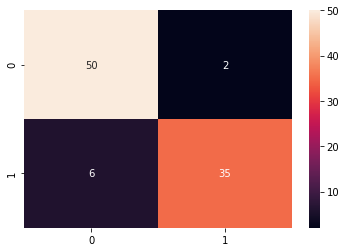

In [111]:
lr_predictions = lr_pipeline.predict(X_test)
# 50 TN 2 FP, 6 FN, 35 TP
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='g')
# 91% accuracy, 92% precision, 91% recall, 91% f1 score
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.97      0.88      0.92        41

    accuracy                           0.94        93
   macro avg       0.94      0.93      0.93        93
weighted avg       0.94      0.94      0.94        93



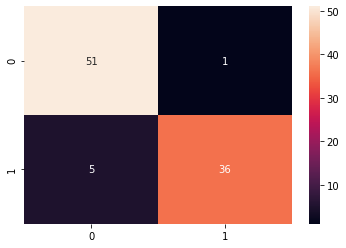

In [112]:
svm_predictions = svm_pipeline.predict(X_test)
# 51 TN 1 FP, 5 FN, 36 TP
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='g')
# 94% accuracy, precision, recall, f1 score
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.92      0.88      0.90        41

    accuracy                           0.91        93
   macro avg       0.92      0.91      0.91        93
weighted avg       0.91      0.91      0.91        93



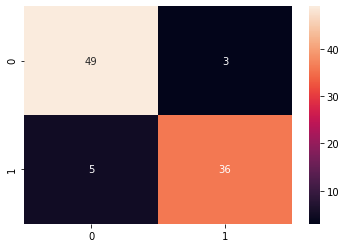

In [113]:
nb_predictions = nb_pipeline.predict(X_test)
# 49 TN 3 FP, 5 FN, 36 TP
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='g')
# 91% accuracy, precision, recall, f1 score
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.93      0.90      0.91        41

    accuracy                           0.92        93
   macro avg       0.92      0.92      0.92        93
weighted avg       0.92      0.92      0.92        93



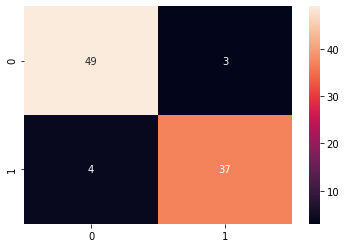

In [114]:
nn_predictions = nn_pipeline.predict(X_test)
# 49 TN 3 FP, 4 FN, 37 TP
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='g')
# 92% accuracy, precision, recall, f1 score
print(classification_report(y_test, nn_predictions))

### Best models

1. SVM
2. Neural Network
3. Logistic Regression
4. Naive Bayes